In [1]:
from ionqvision.ansatze.ansatz_library import AngleEncoder
from qiskit.circuit.library import EfficientSU2, TwoLocal, RealAmplitudes
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit.circuit import ParameterVector
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from ionqvision.ansatze import VariationalAnsatz
import numpy as np
import symengine as symeng
from math import ceil, log
from ionqvision.ansatze import VariationalAnsatz
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterExpression, ParameterVector
from qiskit.quantum_info import SparsePauliOp
# encoder = AngleEncoder(num_qubits=4)

In [2]:
class CustomEncoder(VariationalAnsatz):
    """
    Implement a quantum circuit for encoding.
    """
    def __init__(self, num, reps = 1, param_prefix="x"):
        super().__init__(num)

        x = ParameterVector(param_prefix, num)
        enc = QuantumCircuit(num)
        for j in range(reps):
            for i in range(num):
                enc.ry(x[i], i)
        
        self.compose(enc, inplace=True)

In [4]:
## setting the number of qubits to match the one from the paper
n = 5

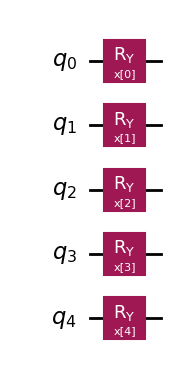

In [5]:
## creating the encoder
encoder =CustomEncoder(n, reps = 1)
encoder.draw("mpl")

In [6]:
class CustomAnsatz(VariationalAnsatz):
    """
    Implement a quantum circuit for replicating the HQNN parallel ansatz.
    """
    def __init__(self, num_qubits, reps, param_prefix="θ"):
        super().__init__(num_qubits)

        theta = ParameterVector(param_prefix, num_qubits)
        qc = QuantumCircuit(num_qubits)
        for j in range(reps):
            for i in range(num_qubits):
                # for k in range(1,4):
                qc.ry(theta[(i)], i)
                    # qc.ry(theta[(i)*3 + 1], i) 
                    # qc.rz(theta[(i)*3 + 2], i) 

            for i in range(num_qubits-1):
                qc.cx(i, i+1)

            # qc.cx(num_qubits-1, 0)
            qc.barrier()
                    
        self.compose(qc, inplace=True)


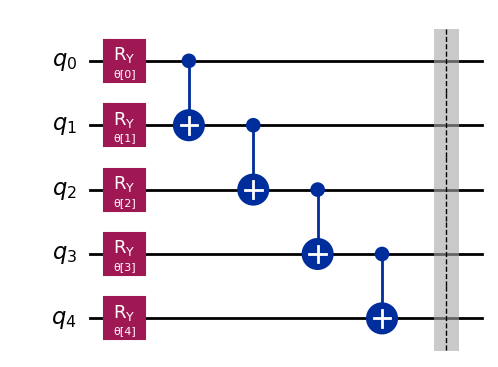

In [7]:
## implementing the ansatz
ansatz = CustomAnsatz(num_qubits=n, reps=1)
ansatz.draw("mpl")

In [8]:
from qiskit.quantum_info import SparsePauliOp

# Measure the expectation value of ZZZZZ
def feature_creation(n):
    return [SparsePauliOp(["Z" + "Z"*(n-1)])]
            # SparsePauliOp(["I"*(n-1) + "Y"]), 
            # SparsePauliOp(["I"*(n-1)  + "Z"])]

quantum_features = feature_creation(n)

In [9]:
quantum_features

[SparsePauliOp(['ZZZZZ'],
               coeffs=[1.+0.j])]

In [10]:
from ionqvision.modules import BinaryMNISTClassifier

# Set up your classifier and inspect its architecture
classifier = BinaryMNISTClassifier(encoder, ansatz, quantum_features);

INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.01001 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00954 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.03743 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.07176 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ElidePermutations - 0.00834 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: RemoveDiagonalGatesBeforeMeasure - 0.04983 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.10562 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutationAnalysis - 0.34595 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutativeCancellation - 0.19026 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Collect2qBlocks - 0.06175 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ConsolidateBlocks - 0.44274 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Split2QUnitaries - 0.03934 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00906 (ms)
INFO:qiskit.passm

In [11]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

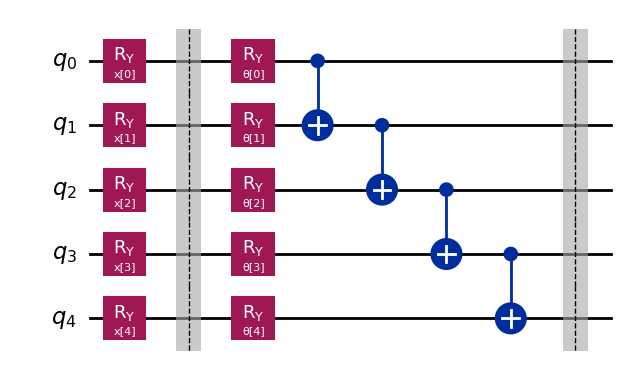

In [12]:
# Check out your quantum layer
classifier.quantum_layer.layer_qc.draw("mpl")

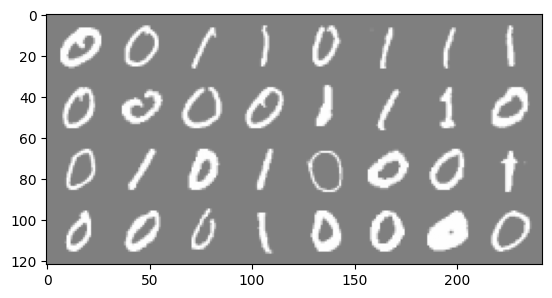

In [13]:
# Verify the images loaded correctly
classifier.visualize_batch()

In [14]:
%%time
# Get a (pre-processed) training and test set
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

train_set

CPU times: user 472 ms, sys: 94.6 ms, total: 567 ms
Wall time: 335 ms


Dataset MNIST
    Number of datapoints: 300
    Root location: ./mnist-train
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [15]:
train_set[0][0].shape

torch.Size([1, 28, 6])

epoch:   1 | loss: 0.698
lr: 0.1000 | processed     6/    6 batches per epoch in 34.57s (0.36s forward / 5.17s backward)
Model achieved 56.000%  accuracy on TRAIN set.
Model achieved 49.000%  accuracy on TEST set.

epoch:   2 | loss: 0.686
lr: 0.1000 | processed     6/    6 batches per epoch in 32.95s (0.30s forward / 4.76s backward)
Model achieved 56.000%  accuracy on TRAIN set.
Model achieved 49.000%  accuracy on TEST set.

epoch:   3 | loss: 0.674
lr: 0.1000 | processed     6/    6 batches per epoch in 33.10s (0.27s forward / 4.42s backward)
Model achieved 44.333%  accuracy on TRAIN set.
Model achieved 36.000%  accuracy on TEST set.

epoch:   4 | loss: 0.658
lr: 0.1000 | processed     6/    6 batches per epoch in 31.50s (0.28s forward / 4.51s backward)
Model achieved 38.333%  accuracy on TRAIN set.
Model achieved 41.000%  accuracy on TEST set.

epoch:   5 | loss: 0.636
lr: 0.1000 | processed     6/    6 batches per epoch in 31.35s (0.28s forward / 4.42s backward)
Model achieved 48.0

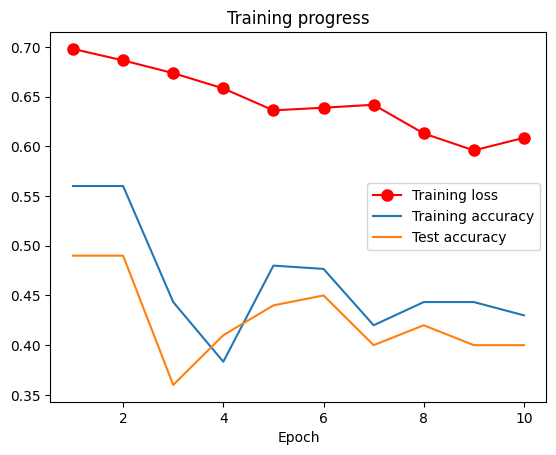

In [16]:
# Configure model training hyper parameters
config = {
    "epochs": 10,
    "lr": 0.1,
    "batch_size": 50,
    "betas": (0.9, 0.99),
    "weight_decay": 1e-3,
    "clip_grad": True,
    "log_interval": 6,
}

# Train and plot the results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()

In [ ]:
from qbraid.runtime import QbraidSession
from ionqvision.scq_client import IonQSCQClient

session = QbraidSession()

client = IonQSCQClient(session=session)

In [ ]:
submission_data = classifier.submit_model_for_grading(client=client)

message = submission_data.get("message")
submission_id = submission_data.get("submissionId")

print(message)

In [ ]:
client.await_autograder_result(submission_id=submission_id)